<a href="https://colab.research.google.com/github/josgherg/transformada-de-Fourier/blob/main/Transformada_discreta_de_Fourier_para_un_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.fftpack as fourier
import scipy.io.wavfile as waves

Duracion del audio:  60.08163265306123 s. Son  2649600  muestras de audio.


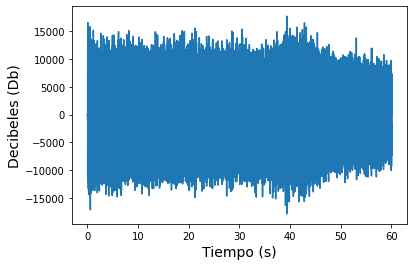

Grafica 1. Decibeles (Db) vs. tiempo (s)



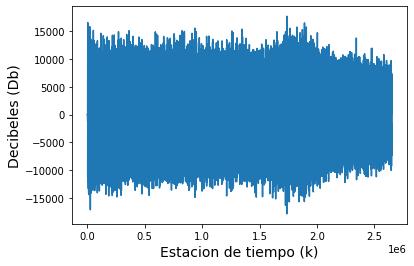

Grafica 2. Decibeles (Db) vs. Estacion de tiempo (k)



In [33]:
filename ='/content/Bomba.Final.wav'                                

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]              
K = len(Audio_m)                                      # Tomamos la longitud de la señal
Tk = np.arange(0,K)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal
k = np. arange(0,K)
print ( "Duracion del audio: ",K/Fs, "s. Son ",K," muestras de audio.")

plt.plot(Tk,Audio_m)
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Decibeles (Db)', fontsize='14')
plt.show()
print ( "Grafica 1. Decibeles (Db) vs. tiempo (s)\n")

plt.plot(k,Audio_m)
plt.xlabel('Estacion de tiempo (k)', fontsize='14')
plt.ylabel('Decibeles (Db)', fontsize='14')
plt.show()
print ( "Grafica 2. Decibeles (Db) vs. Estacion de tiempo (k)\n")

In [34]:
# Copiando los datos del vector audio para su analisis
salto = 60
divisor = 10                                             # Caso deseemos comprmir 
fk = Audio_m[0:int(K / divisor):salto]
N = len(fk)
print("Algoritmo Jose Herrera")
print("fk construido con ", N, "datos muestreados de", K / divisor, "datos totales (",K / (divisor * Fs),"segundos de audio) cada ", salto, "samples.\n" )

# Aplicando el calculo de la transformada. Creando matriz Wn parte real y parte imaginaria
Cs = []                                                # Parte real
iSn = []                                               # Parte imaginaria
print("Creando Matriz Wn...")
factor = 2 * np.pi  / N                     
for n in range(N):
  Cstemp = []
  iSntemp = []
  for k in range (N):
    Cstemp.append(np.cos( n * k * factor))
    iSntemp.append(np.sin(factor * n * k))
  Cs.append(Cstemp)
  iSn.append(iSntemp)
print("Matriz Wn: ", len(Cs), "x", len(iSn))

# Aplicando el calculo de la transformada. Multiplicacion Wn * fk
# Magnitud del numero imaginario Fw
M_Fw =[]   
print("Creando vector resultante Fw...")                        
for n in range(N):
  Fwtemp = 0
  iFwtemp = 0
  for k in range (N):
    Fwtemp = Fwtemp + fk[k] * Cs[n][k]                  # Parte Real
    iFwtemp = iFwtemp + fk[k] * iSn[n][k]               # Parte Imaginaria
  
  M_Fw.append(np.sqrt(Fwtemp ** 2 + iFwtemp ** 2))                                                                      
print("Vector Fw con ", len(M_Fw), "datos")

Algoritmo Jose Herrera
fk construido con  4416 datos muestreados de 264960.0 datos totales ( 6.0081632653061225 segundos de audio) cada  60 samples.

Creando Matriz Wn...
Matriz Wn:  4416 x 4416
Creando vector resultante Fw...
Vector Fw con  4416 datos


Resultados: Algoritmo Jose Herrera.



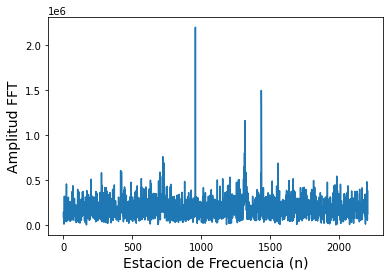

Grafica 5. Amplitud FFT vs. Estacion de Frecuencia (n) evaluada con Algoritmo Jose Herrera.



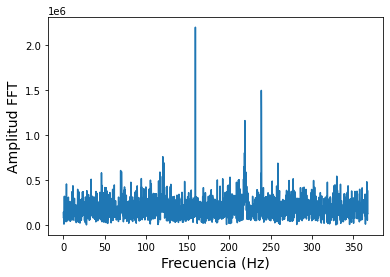

Grafica 6. Amplitud FFT vs. Frecuencia (HZ) evaluada con Algoritmo Jose Herrera.

(Xmax,Ymax) = ( [159.28328804] ,  2201802.9299793355 )


In [35]:
Fn = Fs * np.arange(0, N//2) / (salto * N)
n = N *  np.arange(0,N//2) / N

M_Fw2 = M_Fw[0:N//2]                                   # Tomamos la mitad de los datos (recordar la simetría de la transformada)
print("Resultados: Algoritmo Jose Herrera.\n")
plt.plot(n, M_Fw2)
plt.xlabel('Estacion de Frecuencia (n)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()
print("Grafica 5. Amplitud FFT vs. Estacion de Frecuencia (n) evaluada con Algoritmo Jose Herrera.\n")

plt.plot(Fn, M_Fw2)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()
print("Grafica 6. Amplitud FFT vs. Frecuencia (HZ) evaluada con Algoritmo Jose Herrera.\n")

Posm = np.where(M_Fw2 == np.max(M_Fw2))                # Encontramos la posición para la cual la Magnitud de FFT es máxima   
print ("(Xmax,Ymax) = (", Fn[Posm], ", ",np.max(M_Fw2),")")


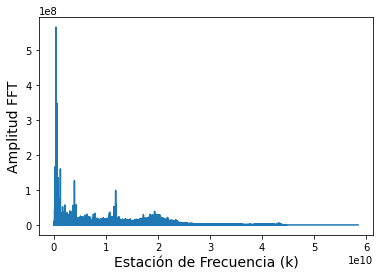

Grafica 3. Amplitud FFT vs. Estacion de Frecuencia (n) evaluada con scypy.



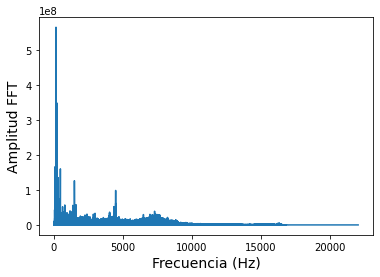

Grafica 4. Amplitud FFT vs. Frecuencia (HZ) evaluada con scypy.

(Frecuncia,Amplitud maxima) = ( [159.31657609] ,  565797630.4943105 )


In [36]:
gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:K//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)
F = Fs*np.arange(0, K//2)/K                      # Tomamos la mitad de los datos (recordar la simetría de la transformada)
Fn = Fs*np.arange(0, K//2)

plt.plot(Fn, M_gk)
plt.xlabel('Estación de Frecuencia (k)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()
print("Grafica 3. Amplitud FFT vs. Estacion de Frecuencia (n) evaluada con scypy.\n")

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()
print("Grafica 4. Amplitud FFT vs. Frecuencia (HZ) evaluada con scypy.\n")

Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima   
print ("(Frecuncia,Amplitud maxima) = (", F[Posm], ", ",np.max(M_gk),")")                            
